# Housing price prediction using Neural Networks

```yaml
titan: v1
service:
  image: tensorflow
  machine:
    cpu: 2
    memory: 2048MB
```

In [125]:
import pandas as pd
from sklearn import preprocessing
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers
from sklearn.model_selection import train_test_split
import numpy as np
import json

In [126]:
url = 'https://raw.githubusercontent.com/josephlee94/intuitive-deep-learning/master/Part%201%3A%20Predicting%20House%20Prices/housepricedata.csv'
df = pd.read_csv(url)

The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:

In [127]:
dataset = df.values

Now, we split the dataset into our input features and the label we wish to predict.

In [128]:
X = dataset[:,0:10]
Y = dataset[:,10]

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [129]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [130]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [131]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [132]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [134]:
model = Sequential([
    Dense(100, activation='relu', input_shape=(10,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 959us/step - loss: 0.5932 - accuracy: 0.7446 - val_loss: 0.4235 - val_accuracy: 0.8447
Epoch 2/100
1022/1022 [==============================] - 0s 103us/step - loss: 0.3897 - accuracy: 0.8366 - val_loss: 0.3749 - val_accuracy: 0.8493
Epoch 3/100
1022/1022 [==============================] - 0s 119us/step - loss: 0.3524 - accuracy: 0.8503 - val_loss: 0.3044 - val_accuracy: 0.8813
Epoch 4/100
1022/1022 [==============================] - 0s 116us/step - loss: 0.3205 - accuracy: 0.8650 - val_loss: 0.2987 - val_accuracy: 0.8858
Epoch 5/100
1022/1022 [==============================] - 0s 118us/step - loss: 0.2977 - accuracy: 0.8845 - val_loss: 0.2863 - val_accuracy: 0.8630
Epoch 6/100
1022/1022 [==============================] - 0s 107us/step - loss: 0.2830 - accuracy: 0.8875 - val_loss: 0.2905 - val_accuracy: 0.8767
Epoch 7/100
1022/1022 [==============================] - 0s 118us/step 

In [90]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [91]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 511us/step - loss: 0.6957 - accuracy: 0.4785 - val_loss: 0.6920 - val_accuracy: 0.4612
Epoch 2/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.6880 - accuracy: 0.5068 - val_loss: 0.6868 - val_accuracy: 0.4749
Epoch 3/100
1022/1022 [==============================] - 0s 44us/step - loss: 0.6832 - accuracy: 0.5391 - val_loss: 0.6833 - val_accuracy: 0.5023
Epoch 4/100
1022/1022 [==============================] - 0s 44us/step - loss: 0.6795 - accuracy: 0.5431 - val_loss: 0.6800 - val_accuracy: 0.5251
Epoch 5/100
1022/1022 [==============================] - 0s 57us/step - loss: 0.6762 - accuracy: 0.5587 - val_loss: 0.6768 - val_accuracy: 0.5525
Epoch 6/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.6729 - accuracy: 0.5861 - val_loss: 0.6737 - val_accuracy: 0.5936
Epoch 7/100
1022/1022 [==============================] - 0s 42us/step - loss

Evaluating our data on the test set:

In [135]:
# GET /loss 
print("Model Loss is {} ".format(model.evaluate(X_test, Y_test)[0]))

219/219 [==============================] - 0s 45us/step
Model Loss is 0.25629456089511854 


In [136]:
# GET /accuracy 
print("Model Accuracy is {} ".format(model.evaluate(X_test, Y_test)[1]))

219/219 [==============================] - 0s 48us/step
Model Accuracy is 0.8995434045791626 


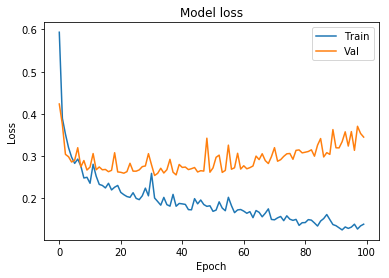

In [139]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [137]:
# Mock request object for local API testing
headers = {
'content-type': 'application/json'
}
body = json.dumps({
  "data": [[0.08994835,0.96666667,0.625,0.1294599,0.66666667,0.5,0.375,0.41666667,0.33333333,0.38222849]]
})
REQUEST = json.dumps({ 'headers': headers, 'body': body })

In [138]:
# POST /prediction
body = json.loads(REQUEST)['body']
input_params = json.loads(body)['data']
input_array = np.array(input_params)
model.predict(input_array) 


array([[0.9997205]], dtype=float32)